## Disney Plus Movies and TV Shows - EDA

* [Kaggle](https://www.kaggle.com/unanimad/disney-plus-shows)

## Questions

How many tv shows are there in the dataset?

[IMDB_id](#imdb_id)

What are the types?

[Type](#type)


I will only analyze the data about movies.

What are the movies about?

[Plot](#plot)

What are the main ratings?

[Rating](#rated)

When were the movies released?

[Release](#released_at)

When were the movies added at the platform?

[Added At](#added_at)

What are the movies' duration?

[Runtime](#runtime)

What are the main genres?

[Genre](#genre)

What are the Directors with most movies produced?

[Director](#director)

What are the Writers with most movies produced?

[Writer](#writer)

What are the main Actors?

[Writer](#actors)

What are the languages available?

[Language](#language)

In which countries the movies are available?

[Country](#country)

Info about awards and critics:

[Awards](#awards)

In [1]:
# open libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# open df
df = pd.read_csv('C:/Users/camil/Desktop/dados/disney.csv', encoding = 'latin1', engine = 'python', delimiter = ',')

In [3]:
# print 4 first rows 
df.head().T

,0,1,2,3,4
imdb_id,tt0147800,tt7019028,tt0115433,tt0324941,tt0211181
title,10 Things I Hate About You,101 Dalmatian Street,101 Dalmatians,101 Dalmatians 2: Patch's London Adventure,102 Dalmatians
plot,"A pretty, popular teenager can't go out on a d...",This series follows the lives of Delilah and D...,An evil high-fashion designer plots to steal D...,"Being one of 101 takes its toll on Patch, who ...",Cruella DeVil gets out of prison and goes afte...
type,movie,series,movie,movie,movie
rated,PG-13,NaN,G,G,G
year,1999,2018â,1996,2002,2000
released_at,31 Mar 1999,25 Mar 2019,27 Nov 1996,21 Jan 2003,22 Nov 2000
added_at,"November 12, 2019","February 28, 2020","November 12, 2019","November 12, 2019","November 12, 2019"
runtime,97 min,NaN,103 min,74 min,100 min
genre,"Comedy, Drama, Romance","Animation, Comedy, Family","Adventure, Comedy, Crime, Family","Animation, Adventure, Comedy, Family, Musical","Adventure, Comedy, Family"


In [4]:
# print info about 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      895 non-null    object 
 1   title        895 non-null    object 
 2   plot         866 non-null    object 
 3   type         895 non-null    object 
 4   rated        739 non-null    object 
 5   year         895 non-null    object 
 6   released_at  875 non-null    object 
 7   added_at     988 non-null    object 
 8   runtime      837 non-null    object 
 9   genre        886 non-null    object 
 10  director     689 non-null    object 
 11  writer       742 non-null    object 
 12  actors       871 non-null    object 
 13  language     866 non-null    object 
 14  country      870 non-null    object 
 15  awards       555 non-null    object 
 16  metascore    291 non-null    float64
 17  imdb_rating  879 non-null    float64
 18  imdb_votes   879 non-null    object 
dtypes: float

#### imdb_id

Internet Movie Database ID

895 non-null    object

In [5]:
# check if there's repetead values
## as expected, there aren't repetead values.

df.imdb_id.value_counts()

tt0144262    1
tt0141369    1
tt0192618    1
tt0772145    1
tt0108783    1
            ..
tt0071288    1
tt0076759    1
tt0166896    1
tt0923160    1
tt0447987    1
Name: imdb_id, Length: 895, dtype: int64

#### title

Show's title

895 non-null    object 

In [6]:
df.title.value_counts() 

Freaky Friday                                   3
Star Wars: The Clone Wars                       2
The Little Mermaid                              2
Lizzie McGuire                                  2
Spider-Man                                      2
                                               ..
Brother Bear                                    1
Star Wars: Episode III - Revenge of the Sith    1
Jungle 2 Jungle                                 1
First Kid                                       1
Marvel Rising: Heart of Iron                    1
Name: title, Length: 873, dtype: int64

#### plot

Show's plot

866 non-null    object 

In [7]:
#filter to only movies
df_disney = df[(df.type == "movie")]

In [8]:
df_disney['plot']

0      A pretty, popular teenager can't go out on a d...
2      An evil high-fashion designer plots to steal D...
3      Being one of 101 takes its toll on Patch, who ...
4      Cruella DeVil gets out of prison and goes afte...
5      A story that follows Kate, a young woman who a...
                             ...                        
983    When Zoey's mom remarries, Zoey finds it hard ...
984    An inquisitive teenager pries into suspected d...
985    A mischievous fifteen-year-old girl living on ...
986    The heroine sets out to win an important compe...
987    In a city of anthropomorphic animals, a rookie...
Name: plot, Length: 681, dtype: object

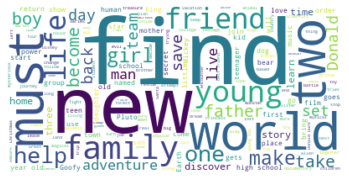

In [9]:
# plot the most frequent words in the movies
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# combine multiple rows into one object
text = df_disney['plot'].str.cat(sep='/ ')

# Create stopword list:
stopwords = set(STOPWORDS)

# Create and generate a word cloud image:
wc= WordCloud(stopwords = stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#wc.to_file("disney.png")
#adapted code from: https://www.datacamp.com/community/tutorials/wordcloud-python

#### type 

Show's type

895 non-null object

In [10]:
# show's type percentage
df.type.value_counts()/len(df)*100

movie      68.927126
series     19.331984
episode     2.327935
Name: type, dtype: float64

There are 3 show's type. 68.93% are movies, 19.33% are series and 2.33% are episodes.

Text(0.5, 1.0, "Disney Show's Type")

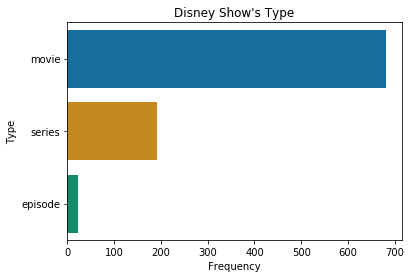

In [11]:
ax = sns.countplot(y = df.type, palette = 'colorblind')
ax.set(xlabel = 'Frequency', ylabel= 'Type')
plt.title("Disney Show's Type")

#### rated 

Rated

739 non-null object

In [12]:
df_disney.rated.value_counts()/len(df_disney)*100

G            30.249633
PG           22.613803
TV-G         13.069016
Approved      7.342144
PG-13         5.433186
TV-PG         3.377386
Not Rated     2.349486
APPROVED      1.174743
Passed        0.587372
TV-Y7         0.440529
TV-Y7-FV      0.293686
PASSED        0.293686
UNRATED       0.146843
TV-14         0.146843
Name: rated, dtype: float64

Text(0.5, 1.0, 'Disney Rate')

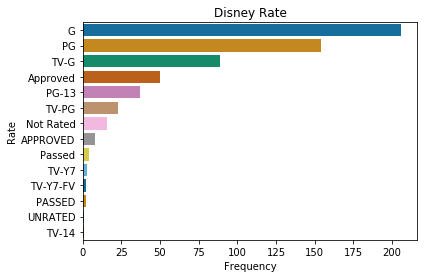

In [13]:
# set order by value_counts
ax = sns.countplot(y = df_disney.rated, palette = 'colorblind', order = df_disney.rated.value_counts().index)
ax.set(xlabel = 'Frequency', ylabel= 'Rate')
plt.title("Disney Rate")

#### year         

895 non-null    object 

In [14]:
df_disney.year.value_counts()/len(df_disney)*100
# this column need to be treated

2019    4.258443
2003    3.964758
2000    3.230543
2011    3.230543
2017    3.230543
          ...   
1970    0.146843
1958    0.146843
1966    0.146843
1982    0.146843
1969    0.146843
Name: year, Length: 89, dtype: float64

#### released_at  

875 non-null    object 

In [15]:
df_disney.released_at.value_counts()/len(df_disney)*100

03 Apr 2020    0.734214
29 Jun 2007    0.440529
12 Nov 2019    0.440529
17 Jun 2016    0.440529
21 Jun 2013    0.293686
                 ...   
18 Mar 2000    0.146843
25 Nov 1938    0.146843
04 Mar 1950    0.146843
10 Nov 1953    0.146843
11 Oct 2009    0.146843
Name: released_at, Length: 638, dtype: float64

In [16]:
## tranform in date
df_disney['released']= df_disney.released_at.astype('datetime64') 

## get only the year
df_disney['released_year'] = df_disney.released.dt.year

## get only the month
df_disney['released_month'] = df_disney.released.dt.month

C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Text(0.5, 0, 'Year')

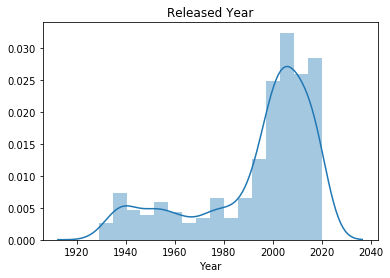

In [17]:
## plot a graph line
sns.distplot(df_disney.released_year)
plt.title('Released Year')
plt.xlabel("Year")

Text(0, 0.5, 'Month')

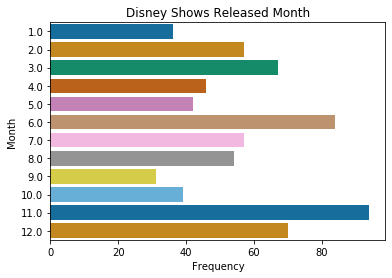

In [18]:
# plot released_month
sns.countplot(y = df_disney.released_month, palette = 'colorblind')
plt.title('Disney Shows Released Month')
plt.xlabel('Frequency')
plt.ylabel('Month')

Disney Plus Tv Shows are more released in November, June and March.

#### added_at     

When the title was added in platform

988 non-null    object 

In [19]:
## tranform in date
df_disney['added'] = df_disney.added_at.astype('datetime64')

## get only the year
df_disney['added_year'] = df_disney.added.dt.year
df_disney['added_month'] = df_disney.added.dt.month

C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [20]:
# explore added_year
df_disney.added_year.value_counts()/len(df_disney) * 100

2019    87.077827
2020    12.922173
Name: added_year, dtype: float64

In [21]:
# plot added_month
df_disney.added_month.value_counts()/len(df_disney)*100

11    84.287812
4      5.286344
1      2.790015
2      1.908957
12     1.468429
5      1.468429
3      1.468429
10     1.321586
Name: added_month, dtype: float64

Text(0, 0.5, 'Month')

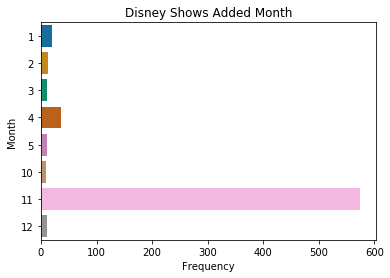

In [22]:
# plot added_month
sns.countplot(y = df_disney.added_month, palette = 'colorblind')
plt.title('Disney Shows Added Month')
plt.xlabel('Frequency')
plt.ylabel('Month')

#### runtime     

837 non-null    object 

In [23]:
## convert to a float
df_disney['runtime'] = df_disney.runtime.str.rstrip('min')
df_disney['runtime'] = df_disney.runtime.str.rstrip('h').astype(float)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df_disney.runtime.describe()

count    661.000000
mean      78.369138
std       37.545567
min        3.000000
25%       70.000000
50%       88.000000
75%      100.000000
max      181.000000
Name: runtime, dtype: float64

Text(0.5, 1.0, 'Runtime')

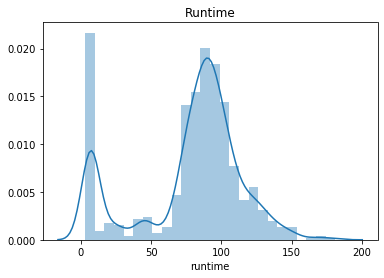

In [25]:
sns.distplot(df_disney.runtime)
plt.title('Runtime')

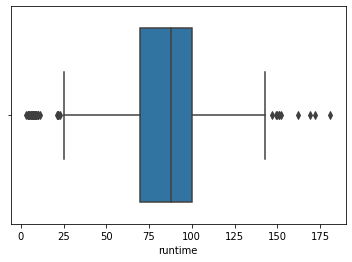

In [26]:
sns.boxplot(df_disney.runtime)

#### genre 

886 non-null    object 

In [27]:
df_disney.genre.value_counts()/len(df_disney)*100

Documentary                                             4.992658
Animation, Short, Comedy, Family                        2.349486
Comedy, Family, Fantasy                                 2.202643
Animation, Adventure, Comedy, Family, Fantasy           2.202643
Action, Adventure, Sci-Fi                               2.055800
                                                          ...   
Comedy, Crime, Family, Mystery                          0.146843
Family, Adventure, Sci-Fi, Fantasy                      0.146843
Animation, Family, Short                                0.146843
Animation, Adventure, Comedy, Crime, Family, Mystery    0.146843
Family, Sci-Fi                                          0.146843
Name: genre, Length: 292, dtype: float64

In [47]:
#create a df that split the director column
df_genre = df_disney.assign(var1 = df_disney.genre.str.split(',')).explode('var1').reset_index(drop = True)

#To remove white space at the beginning of string:
df_genre['var1'] = df_genre.var1.str.lstrip()

Text(0, 0.5, '')

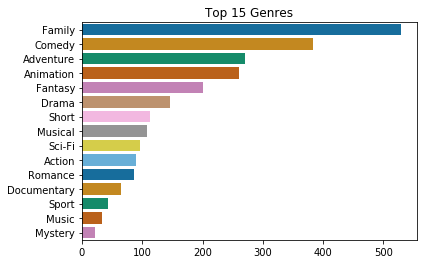

In [50]:
#plot the top 15 genres 
sns.countplot(y = df_genre.var1, order=df_genre.var1.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('Top 15 Genres')
plt.xlabel('')
plt.ylabel('')

#### director     

689 non-null    object                                             

In [28]:
#create a df that split the director column
df_director = df_disney.assign(var1 = df_disney.director.str.split(',')).explode('var1').reset_index(drop = True)

#To remove white space at the beginning of string:
df_director['var1'] = df_director.var1.str.lstrip()

Text(0, 0.5, '')

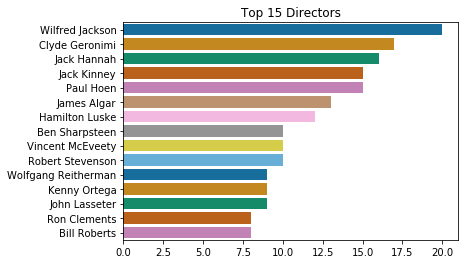

In [29]:
#plot top 15 directors with the most movies produced
sns.countplot(y = df_director.var1, order=df_director.var1.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('Top 15 Directors')
plt.xlabel('')
plt.ylabel('')

####  writer       

742 non-null    object 

In [30]:
#create a df that split the writer column
df_writer = df_disney.assign(var1 = df_disney.writer.str.split(',')).explode('var1').reset_index(drop = True)

#To remove white space at the beginning of string:
df_writer['var1'] = df_writer.var1.str.lstrip()

Text(0, 0.5, '')

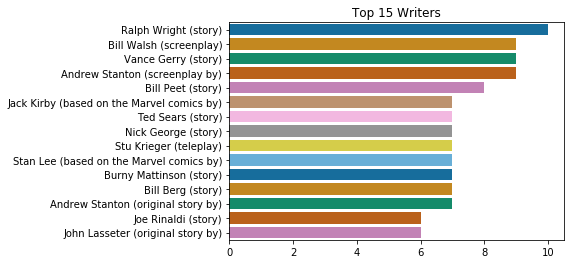

In [31]:
#plot top 15 writers with the most movies produced
sns.countplot(y = df_writer.var1, order=df_writer.var1.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('Top 15 Writers')
plt.xlabel('')
plt.ylabel('')

####  actors      

871 non-null    object 

In [32]:
#create a df that split the writer column
df_actors = df_disney.assign(var1 = df_disney.actors.str.split(',')).explode('var1').reset_index(drop = True)

#To remove white space at the beginning of string:
df_actors['var1'] = df_actors.var1.str.lstrip()

Text(0, 0.5, '')

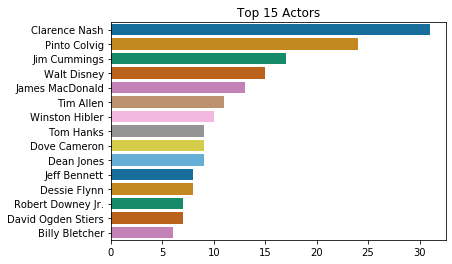

In [33]:
#plot top 15 actors with the most movies produced
sns.countplot(y = df_actors.var1, order=df_actors.var1.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('Top 15 Actors')
plt.xlabel('')
plt.ylabel('')

#### language    

Languages available

866 non-null    object 

In [34]:
#create a df that split the writer column
df_lang= df_disney.assign(var1 = df_disney.language.str.split(',')).explode('var1').reset_index(drop = True)

#To remove white space at the beginning of string:
df_lang['var1'] = df_lang.var1.str.lstrip()

Text(0, 0.5, '')

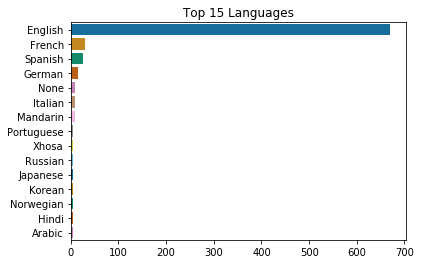

In [35]:
#plot top 15 actors with the most movies produced
sns.countplot(y = df_lang.var1, order=df_lang.var1.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('Top 15 Languages')
plt.xlabel('')
plt.ylabel('')

#### country      
Country available

870 non-null    object 

In [36]:
#create a df that split the writer column
df_countries= df_disney.assign(var1 = df_disney.country.str.split(',')).explode('var1').reset_index(drop = True)

#To remove white space at the beginning of string:
df_countries['var1'] = df_countries.var1.str.lstrip()

Text(0, 0.5, '')

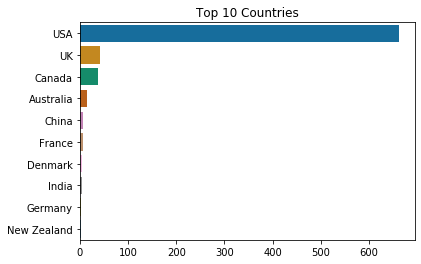

In [54]:
#plot top 10 countries
sns.countplot(y = df_countries.var1, order=df_countries.var1.value_counts().iloc[:10].index, palette = 'colorblind')
plt.title('Top 10 Countries')
plt.xlabel('')
plt.ylabel('')

####  awards       

555 non-null    object 

In [38]:
df_disney.awards.value_counts()/len(df_disney)*100

1 nomination.                                                 6.461087
2 nominations.                                                5.433186
3 nominations.                                                2.936858
1 win.                                                        2.790015
1 win & 1 nomination.                                         2.496329
                                                                ...   
Won 1 Oscar. Another 14 wins & 38 nominations.                0.146843
Nominated for 1 Oscar. Another 10 wins & 26 nominations.      0.146843
Nominated for 1 Oscar. Another 19 wins & 39 nominations.      0.146843
Nominated for 3 Oscars. Another 6 wins & 4 nominations.       0.146843
Nominated for 5 Oscars. Another 62 wins & 125 nominations.    0.146843
Name: awards, Length: 214, dtype: float64

In [39]:
df_disney.awards.describe()

count               433
unique              214
top       1 nomination.
freq                 44
Name: awards, dtype: object

#### metascore    

291 non-null    float64

In [40]:
df_disney.metascore.describe()

count    291.000000
mean      62.003436
std       15.772193
min       19.000000
25%       51.000000
50%       61.000000
75%       73.000000
max       99.000000
Name: metascore, dtype: float64

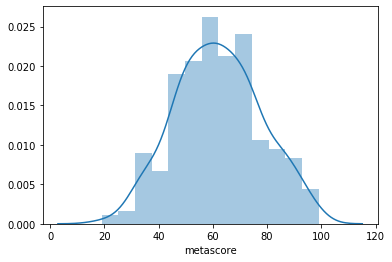

In [41]:
# metascore density plot
sns.distplot(df_disney.metascore)

#### imdb_rating 

879 non-null    float64

In [42]:
df_disney.imdb_rating.describe()

count    676.000000
mean       6.575000
std        1.008561
min        1.500000
25%        6.000000
50%        6.700000
75%        7.300000
max        8.700000
Name: imdb_rating, dtype: float64

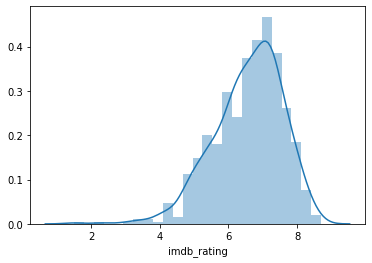

In [43]:
sns.distplot(df_disney.imdb_rating)

#### imdb_votes   

Internet Movie Database votes

879 non-null    object 

In [44]:
# replace ',' with ''
df_disney['imdb_votes'] = df_disney.imdb_votes.str.replace(',', '').astype(float)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
df_disney.imdb_votes.describe()

count    6.760000e+02
mean     7.888438e+04
std      1.922887e+05
min      5.000000e+00
25%      1.092000e+03
50%      5.678500e+03
75%      4.118225e+04
max      1.225316e+06
Name: imdb_votes, dtype: float64

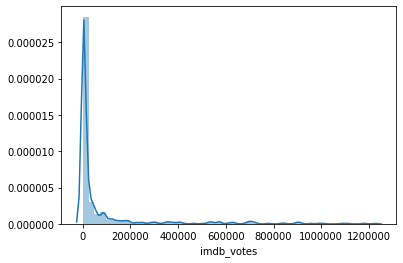

In [46]:
sns.distplot(df_disney.imdb_votes)